# carblacac/twitter-sentiment-analysis
#### NLP HW1  Due date: March 29
#### Team Member: B908108028 李子儀/  108810039 張洸銘

In [1]:
Topic = 'twitter-sentiment-analysi'
Author = ['Alice']
# Author_token = [My_Token]  ##

import time as ti
Date = ti.ctime()
Message = ''

### Functions and Packages

In [2]:
import numpy as np
import pandas as pd
import csv
import re, pickle
import glob, os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
#
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
def open_csvfile(dataframe, file_name, seperator):
    print('check, dataframe, file_name, seperator')
    dataframe =  pd.read_csv(file_name, sep = seperator)
    print('open csv file ', file_name)
    
    return dataframe

def save_csvfile(dataframe, file_name):
    print('check dataframe, file_name')
    dataframe.to_csv(file_name,encoding='utf-8',index=False)
    print('save file ', file_name)
    

def open_pkl(dataframe, file_name):
    print('check dataframe, file_name')
    dataframe = pd.read_pickle(file_name)
    print('open pkl file ', file_name)
    
    return dataframe


def get_dataCol(Data_Column):
    Data = list(Data_Column)
    
    return Data


def box_plot(dataframe, Column_list):
    boxplot = dataframe.boxplot(column = Column_list)
    plt.show
    plt.close

def bar_chart(Data_Column):
     sns.countplot(get_dataCol(Data_Column))

### Notify Setting

In [4]:
import requests

def lineNotifyMessage(msg):
    for token in Author_token:
        headers = {
            "Authorization": "Bearer " + token, 
            "Content-Type" : "application/x-www-form-urlencoded"
        }
        payload = {'message': msg }
        r = requests.post("https://notify-api.line.me/api/notify", headers = headers, params = payload)

In [5]:
lineNotifyMessage ('Start')

### Open File

In [6]:
#train = open_csvfile('data', 'Sentiment Analysis Dataset.csv', ' , ')
data = pd.read_csv('Sentiment Analysis Dataset.csv', on_bad_lines='skip')

In [7]:
data

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


#### Visualizing data distributions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


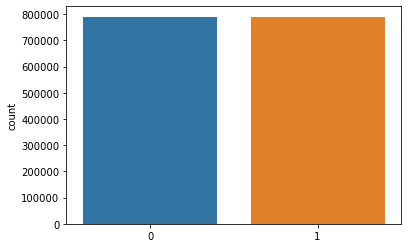

In [8]:
bar_chart(data['Sentiment']) # a balance data

In [9]:
np.random.seed(500)

In [10]:
Corpus = data.copy()
Corpus = Corpus.rename(columns={'Sentiment': 'label'})
Corpus = Corpus.rename(columns={'SentimentText':'text'})

In [11]:
Corpus

,ItemID,label,SentimentSource,text
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


### Data Preprocess

In [ ]:
Corpus['text'].dropna(inplace=True)
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [17]:
save_csvfile(Corpus, 'tokenized.csv')
Corpus_org = Corpus.copy()

lineNotifyMessage ('tokenized')

In [16]:
# Corpus = open_csvfile('Corpus','tokenized.csv', ',')

check, dataframe, file_name, seperator
open csv file  tokenized.csv


### ML Train

In [18]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.2)

In [19]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [20]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

### MultinomialNB

In [21]:
MNB = naive_bayes.MultinomialNB()
MNB.fit(Train_X_Tfidf,Train_Y)
predictions_MNB = MNB.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_MNB, Test_Y)*100)

Naive Bayes Accuracy Score ->  75.32773982256599


In [31]:
confusion_matrix(predictions_MNB,Test_Y)

array([[117668,  37613],
       [ 40283, 120159]], dtype=int64)

<AxesSubplot:>

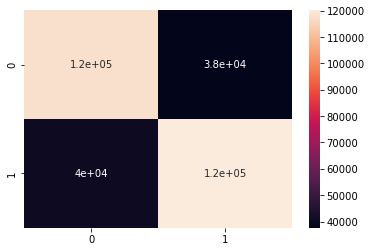

In [22]:
sns.heatmap(confusion_matrix(predictions_MNB,Test_Y), annot=True)

In [23]:
print(classification_report(predictions_MNB,Test_Y))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75    155281
           1       0.76      0.75      0.76    160442

    accuracy                           0.75    315723
   macro avg       0.75      0.75      0.75    315723
weighted avg       0.75      0.75      0.75    315723



### CNB

In [24]:
CNB = naive_bayes.ComplementNB()
CNB.fit(Train_X_Tfidf,Train_Y)
predictions_CNB = CNB.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_CNB, Test_Y)*100)

Naive Bayes Accuracy Score ->  75.16493888630224


In [28]:
confusion_matrix(predictions_CNB,Test_Y)

array([[119524,  39983],
       [ 38427, 117789]], dtype=int64)

<AxesSubplot:>

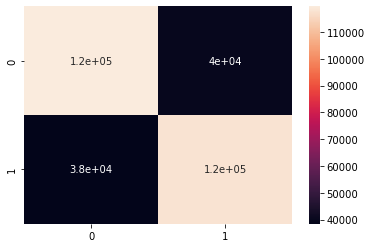

In [30]:
sns.heatmap(confusion_matrix(predictions_CNB,Test_Y), annot=True)

In [26]:
print(classification_report(predictions_CNB,Test_Y))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75    159507
           1       0.75      0.75      0.75    156216

    accuracy                           0.75    315723
   macro avg       0.75      0.75      0.75    315723
weighted avg       0.75      0.75      0.75    315723



### RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(Train_X_Tfidf,Train_Y)
predictions_RF = RF.predict(Test_X_Tfidf)
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)

In [ ]:
confusion_matrix(predictions_RF,Test_Y)

In [ ]:
sns.heatmap(confusion_matrix(predictions_RF,Test_Y), annot=True)

In [ ]:
print(classification_report(predictions_RF,Test_Y))

### svm.SVC

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

In [ ]:
sns.heatmap(confusion_matrix(predictions_SVM,Test_Y), annot=True)

In [ ]:
print(classification_report(predictions_SVM,Test_Y))

In [ ]:
lineNotifyMessage ('SVC')

###